# Distribution with two gaussian peaks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


# 1D Gaussian

Definition:
$$
p(x) = \frac{1}{\sqrt{2 \pi} \sigma}  \exp\left[ -\frac{1}{2} \frac{(x - \mu)^{2}}{\sigma^{2}}\right] 
$$

In [2]:
def define_gaussian(mu, sigma):
    def gaussian(x):
        return 1. / (np.sqrt(2. * np.pi) * sigma) * np.exp(- 0.5 * ((x - mu) / sigma) ** 2.)
    return gaussian

## Data

In [3]:
# define two gaussians
g1 = define_gaussian(-2, 0.5)
g2 = define_gaussian(2, 0.5)

In [4]:
# generate data
x = np.linspace(-5, 5, 500)
x_val = np.random.uniform(-5, 5, 100)
y = g1(x) + g2(x)
y_val = g1(x_val) + g2(x_val)

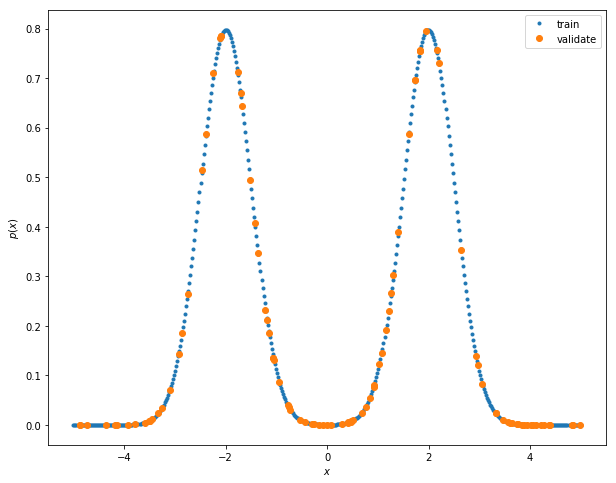

In [5]:
fig = plt.figure(figsize=(10, 8))
plt.plot(x, y, '.', label="train")
plt.plot(x_val, y_val, 'o', label="validate")
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.show()
fig.savefig('1d-gaussian.png')

## Model

In [11]:
n_neurons = [1000]

In [12]:
y_pred = np.empty(n_neurons[-1], dtype=np.ndarray)
for n in n_neurons:
    model = Sequential()
    model.add(Dense(n, input_shape=(1,), activation='tanh'))
    for _ in range(1):
        model.add(Dense(n, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    model.compile(SGD(momentum=0.9, nesterov=True), loss='mean_squared_error')
    print(f'Training network with {n} neuron(s)')
    hist = model.fit(x, y, validation_data=(x_val, y_val), epochs=1000, batch_size=100, verbose=0)
    y_pred[n - 1] = model.predict(x_val)

Training network with 1000 neuron(s)


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total params: 1,004,001
Trainable params: 1,004,001
Non-trainable params: 0
_________________________________________________________________


### Predictions

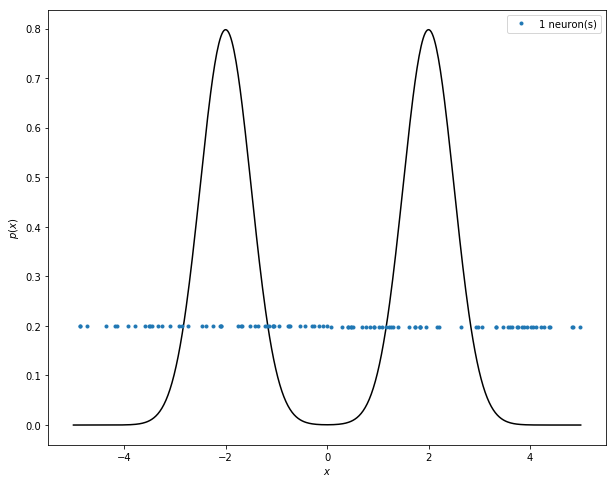

In [8]:
fig = plt.figure(figsize=(10, 8))
plt.plot(x, y, 'k')
for i, preds in enumerate(y_pred):
    plt.plot(x_val, preds, '.', label=f"{i + 1} neuron(s)")
plt.xlabel(r'$x$')
plt.ylabel(r'$p(x)$')
plt.legend()
plt.show()
#fig.savefig("1d_gaussian_2_peaks_10layers.png")